## 베이스라인 코드
---
제공되는 Baseline Code는 본 인증 평가의 데이터 분석 방법 이해를 돕기 위한 참고용이며,

자율적으로 분석 Tool을 선택 및 활용하여 평가에 참여하실 수 있습니다.

## 1.데이터 불러오기

In [45]:
import pandas as pd

train = pd.read_csv('example/train.csv')
test = pd.read_csv('example/test.csv')
train.head(5)

,id,S_Angle,B_PRES,B_FLAG,LAT_ACCEL,LONG_ACCEL,YAW_RATE,E_Status,B_Depth,A_Depth,...,Y,Z,BVP,EDA,HR,TEMP,Var_2,Var_3,Var_4,GPSMode
0,1,8.50,0.0,0,0.402857,-0.238571,1.280000,0,0,0,...,18.666667,-13.666667,-158.055,0.289273,83.5015,33.00,37.577511,126.887651,6,2
1,2,-106.98,0.0,0,-2.171250,0.502500,-16.358750,0,0,18,...,7.500000,-0.500000,3.560,0.312594,87.1428,33.11,37.572471,126.888817,7,2
2,3,-10.20,0.0,0,-0.482857,0.606786,-4.181071,0,0,30,...,15.000000,3.000000,22.460,0.191277,60.1490,30.75,37.582494,126.937084,8,2
3,4,-1.80,0.0,0,-0.006250,-0.065000,-0.698750,0,0,0,...,-16.666667,55.333333,-58.440,0.375430,53.3865,34.09,37.589210,126.913211,7,2
4,5,1.20,0.0,0,0.200000,0.480000,0.120000,1,0,36,...,-7.000000,48.666667,-46.380,0.207473,65.1733,30.81,37.577684,126.930549,8,2


In [13]:
# train.info()
train.isnull().sum()
train.shape

import numpy as np
np.unique(list(train))

array(['A_Depth', 'BA_SoC', 'BVP', 'B_Depth', 'B_FLAG', 'B_PRES', 'CT',
       'DriveMode', 'EDA', 'E_Col_Temp', 'E_Speed', 'E_Status',
       'F_Economy', 'GPSMode', 'G_Status', 'HL_High', 'HL_Low', 'HR',
       'HevMode', 'Inhibit_D', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R',
       'LAT_ACCEL', 'LONG_ACCEL', 'MC', 'MS', 'S_Angle', 'TEMP',
       'V_Speed', 'Var_1', 'Var_2', 'Var_3', 'Var_4', 'WHL_SPD_FL',
       'WHL_SPD_FR', 'WHL_SPD_RL', 'WHL_SPD_RR', 'X', 'Y', 'YAW_RATE',
       'Z', 'id'], dtype='<U10')

## 2. 데이터 전처리

데이터를 분석이 용이하도록 가공합니다.

In [31]:
# 학습 데이터를 정제하고 정답 값을 분리해줍니다.
train_x = train.drop(columns=['GPSMode'])
train_y = train['GPSMode']

## 3. 분석 모델 설계

분석을 위한 모델을 준비합니다.

여기서는 가장 간단한 로지스틱 모델을 사용하여 분류 모델을 생성합니다.

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, max_iter=10)

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

## 4. 모델 학습

분석 모델을 학습시킵니다.

In [30]:
model.fit(train_x, train_y)

C:\Users\soo.LAPTOP-ECKJ57H0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=10)

## 5. 예측값 생성
학습한 모델을 사용하여 예측값을 생성합니다.

In [22]:
prediction = model.predict(test)
prediction

array([1.98, 1.98, 1.98, ..., 3.34, 3.34, 3.34])

## 6. 제출 파일 생성

submission 파일을 만들어서 제출합니다.

In [24]:
submission = pd.read_csv('example/sample_submission.csv')

submission['GPSMode'] = prediction

In [25]:
# submission을 csv 파일로 다운 받습니다.
submission.to_csv('베이스라인.csv', index=False)

## 7. -ing

In [10]:
import pandas as pd
train = pd.read_csv('example/train.csv')

# 데이터 분포 확인
# train.info()
# train.describe()
# train.isnull().sum()

PCA(n_components=34)

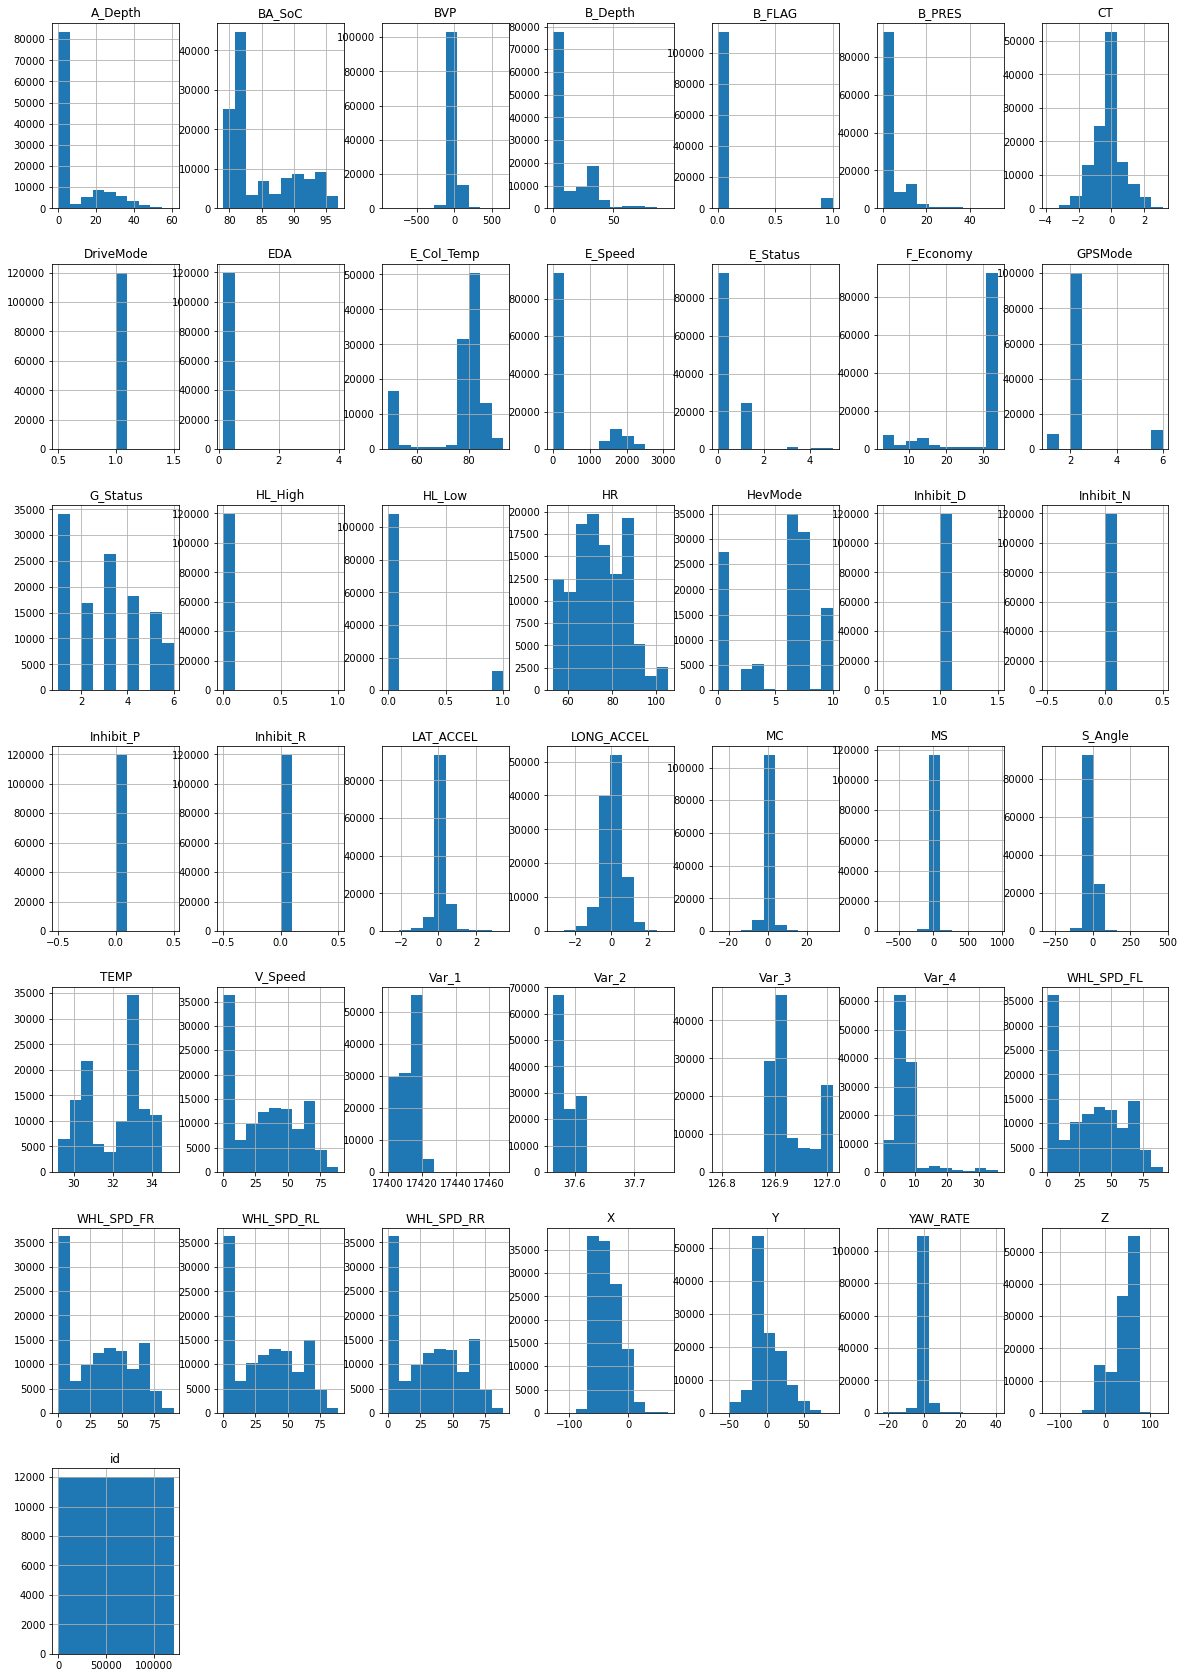

In [7]:
# train.hist(figsize=(20, 30))

from sklearn.decomposition import PCA
# PCA 활용
# https://chancoding.tistory.com/56

In [11]:
y = train['GPSMode']
train = train.drop(columns=['GPSMode'])

x = train.values
columns = train.columns

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

my_pipeline = Pipeline([('mean_imputer', lmputer(strategy='mean')), ('mm_scaler', MinMaxScaler())])

x_train_fit = my_pipeline.fit(x_train)
x_train_pre = x_train_fit.transform(x_train)
x_test_pre = x_train_fit.transform(x_test)
print(pd.DataFrame(x_train_pre).describe()) #전처리 상황 확인

y_train_fit = my_pipeline.fit(y_train)
y_train_pre = y_train_fit.transform(y_train)
y_test_pre = y_train_fit.transform(y_test)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\soo.LAPTOP-ECKJ57H0\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [96]:
print('Train data\'s Accuracy:', format(model.score(x_train, y_train)))

from sklearn.metrics import accuracy_score, r2_score
print('Test  data\'s Accuracy:', format(model.score(x_test, y_test)))
print('Test  data\'s Accuracy:', format(r2_score(y_test, model.predict(x_test))))

# import matplotlib.pyplot as plt
# plt.scatter(x_train['id'], y_train)
# plt.show()

print("\n")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's Accuracy: 0.7278439591730704
Test  data's Accuracy: 0.7317940527148474
Test  data's Accuracy: 0.7317940527148474


RMSE: 0.6199011926003188
MAE : 0.36493688327307344
